In [ ]:
#import all the required libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_squared_error

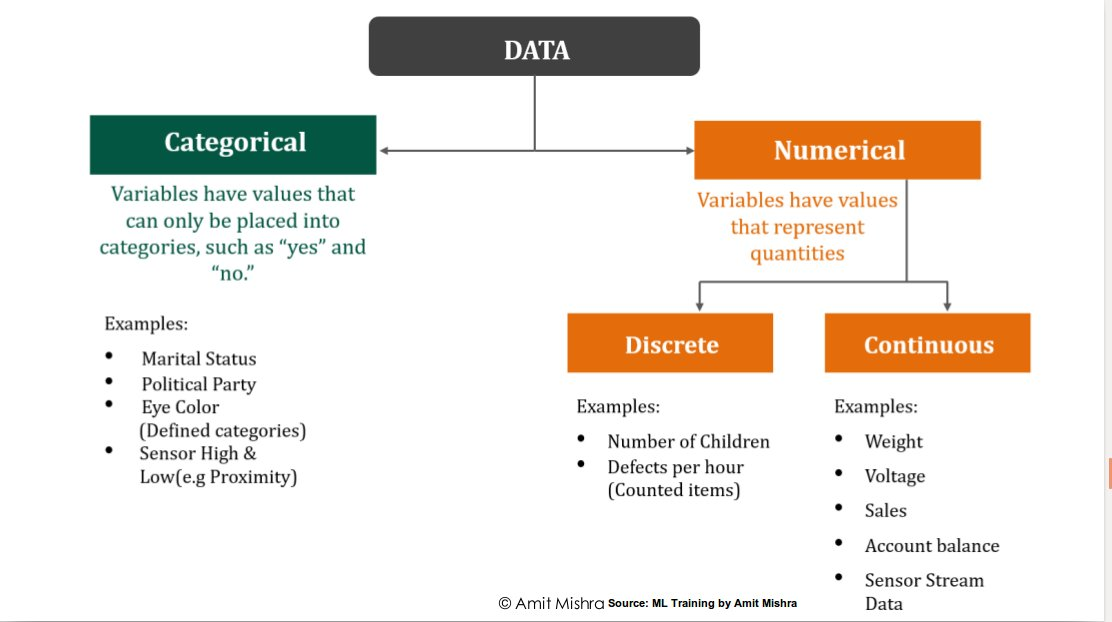

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
img = cv2.imread('/content/drive/MyDrive/Datasets/Week 4/type_data.jpg', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

In [ ]:
# Import dataset
toyota_df = pd.read_csv("/content/drive/MyDrive/Datasets/Week 4/Toyota.csv",index_col=0,na_values=['??','???','????'])

In [ ]:
toyota_df.info

<bound method DataFrame.info of       Price   Age       KM FuelType  ...  Automatic    CC  Doors  Weight
0     13500  23.0  46986.0   Diesel  ...          0  2000  three    1165
1     13750  23.0  72937.0   Diesel  ...          0  2000      3    1165
2     13950  24.0  41711.0   Diesel  ...          0  2000      3    1165
3     14950  26.0  48000.0   Diesel  ...          0  2000      3    1165
4     13750  30.0  38500.0   Diesel  ...          0  2000      3    1170
...     ...   ...      ...      ...  ...        ...   ...    ...     ...
1431   7500   NaN  20544.0   Petrol  ...          0  1300      3    1025
1432  10845  72.0      NaN   Petrol  ...          0  1300      3    1015
1433   8500   NaN  17016.0   Petrol  ...          0  1300      3    1015
1434   7250  70.0      NaN      NaN  ...          0  1300      3    1015
1435   6950  76.0      1.0   Petrol  ...          0  1600      5    1114

[1436 rows x 10 columns]>

In [ ]:
# check the data using head()
toyota_df.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986.0,Diesel,90.0,1.0,0,2000,three,1165
1,13750,23.0,72937.0,Diesel,90.0,1.0,0,2000,3,1165
2,13950,24.0,41711.0,Diesel,90.0,NaN,0,2000,3,1165
3,14950,26.0,48000.0,Diesel,90.0,0.0,0,2000,3,1165
4,13750,30.0,38500.0,Diesel,90.0,0.0,0,2000,3,1170


In [ ]:
toyota_df.count

<bound method DataFrame.count of       Price   Age       KM FuelType  ...  Automatic    CC  Doors  Weight
0     13500  23.0  46986.0   Diesel  ...          0  2000  three    1165
1     13750  23.0  72937.0   Diesel  ...          0  2000      3    1165
2     13950  24.0  41711.0   Diesel  ...          0  2000      3    1165
3     14950  26.0  48000.0   Diesel  ...          0  2000      3    1165
4     13750  30.0  38500.0   Diesel  ...          0  2000      3    1170
...     ...   ...      ...      ...  ...        ...   ...    ...     ...
1431   7500   NaN  20544.0   Petrol  ...          0  1300      3    1025
1432  10845  72.0      NaN   Petrol  ...          0  1300      3    1015
1433   8500   NaN  17016.0   Petrol  ...          0  1300      3    1015
1434   7250  70.0      NaN      NaN  ...          0  1300      3    1015
1435   6950  76.0      1.0   Petrol  ...          0  1600      5    1114

[1436 rows x 10 columns]>

In [ ]:
toyota_df.describe()

,Price,Age,KM,HP,MetColor,Automatic,CC,Weight
count,1436.000000,1336.000000,1421.000000,1430.000000,1286.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.672156,68647.239972,101.478322,0.674961,0.055710,1566.827994,1072.45961
std,3626.964585,18.589804,37333.023589,14.768255,0.468572,0.229441,187.182436,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,1000.00000
25%,8450.000000,43.000000,43210.000000,90.000000,0.000000,0.000000,1400.000000,1040.00000
50%,9900.000000,60.000000,63634.000000,110.000000,1.000000,0.000000,1600.000000,1070.00000
75%,11950.000000,70.000000,87000.000000,110.000000,1.000000,0.000000,1600.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,1.000000,2000.000000,1615.00000


In [ ]:
# Check if there is any null value in the dataset.
toyota_df.isnull().sum()

Price          0
Age          100
KM            15
FuelType     100
HP             6
MetColor     150
Automatic      0
CC             0
Doors          0
Weight         0
dtype: int64

In [ ]:
toyota_df['Doors'] = toyota_df['Doors'].replace('three',3)
toyota_df['Doors'] = toyota_df['Doors'].replace('four',4)
toyota_df['Doors'] = toyota_df['Doors'].replace('five',5)

In [ ]:
from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
mode_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
toyota_df['Age'] = mean_imputer.fit_transform(toyota_df['Age'].values.reshape(-1,1))[:,0]

In [ ]:
toyota_df['KM'] = mean_imputer.fit_transform(toyota_df['KM'].values.reshape(-1,1))[:,0]

In [ ]:
mode_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
toyota_df['FuelType'] = mode_imputer.fit_transform(toyota_df['FuelType'].values.reshape(-1,1))[:,0]

In [ ]:
toyota_df['MetColor'] = mode_imputer.fit_transform(toyota_df['MetColor'].values.reshape(-1,1))[:,0]

In [ ]:
toyota_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1436 non-null   int64  
 1   Age        1436 non-null   float64
 2   KM         1436 non-null   float64
 3   FuelType   1436 non-null   object 
 4   HP         1430 non-null   float64
 5   MetColor   1436 non-null   float64
 6   Automatic  1436 non-null   int64  
 7   CC         1436 non-null   int64  
 8   Doors      1436 non-null   object 
 9   Weight     1436 non-null   int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 123.4+ KB


In [ ]:
toyota_df.isnull().sum()

Price        0
Age          0
KM           0
FuelType     0
HP           6
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

In [ ]:
#Values of HP
toyota_df.HP = toyota_df['HP'].astype('float32')

In [ ]:
# Replace missing values by mean
toyota_df['HP'] = mean_imputer.fit_transform(toyota_df['HP'].values.reshape(-1,1))[:,0]

In [ ]:
toyota_df.HP = toyota_df['HP'].astype('float32')
# Replace missing values by mean
toyota_df['HP'] = mean_imputer.fit_transform(toyota_df['HP'].values.reshape(-1,1))[:,0]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


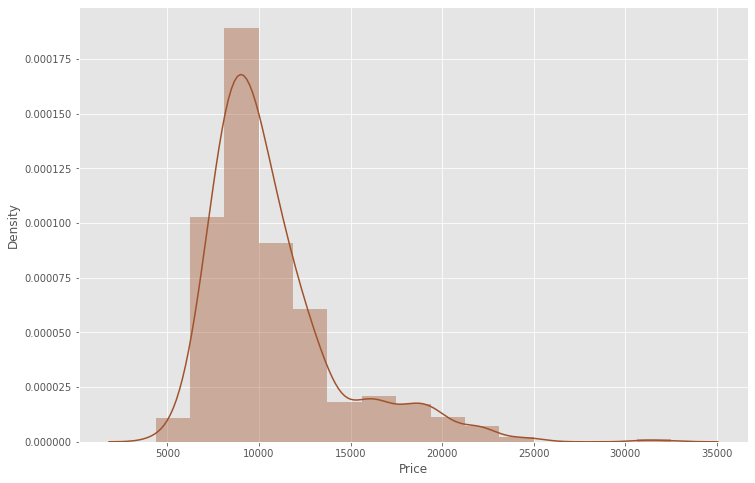

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(12,8))
sns.distplot(toyota_df.Price,bins=15,color='sienna')

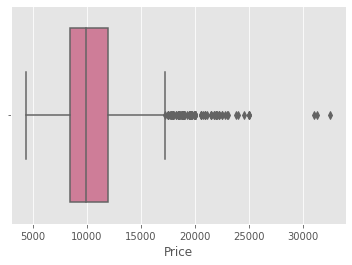

In [ ]:
sns.boxplot(x=toyota_df['Price'],orient='h',color='palevioletred')

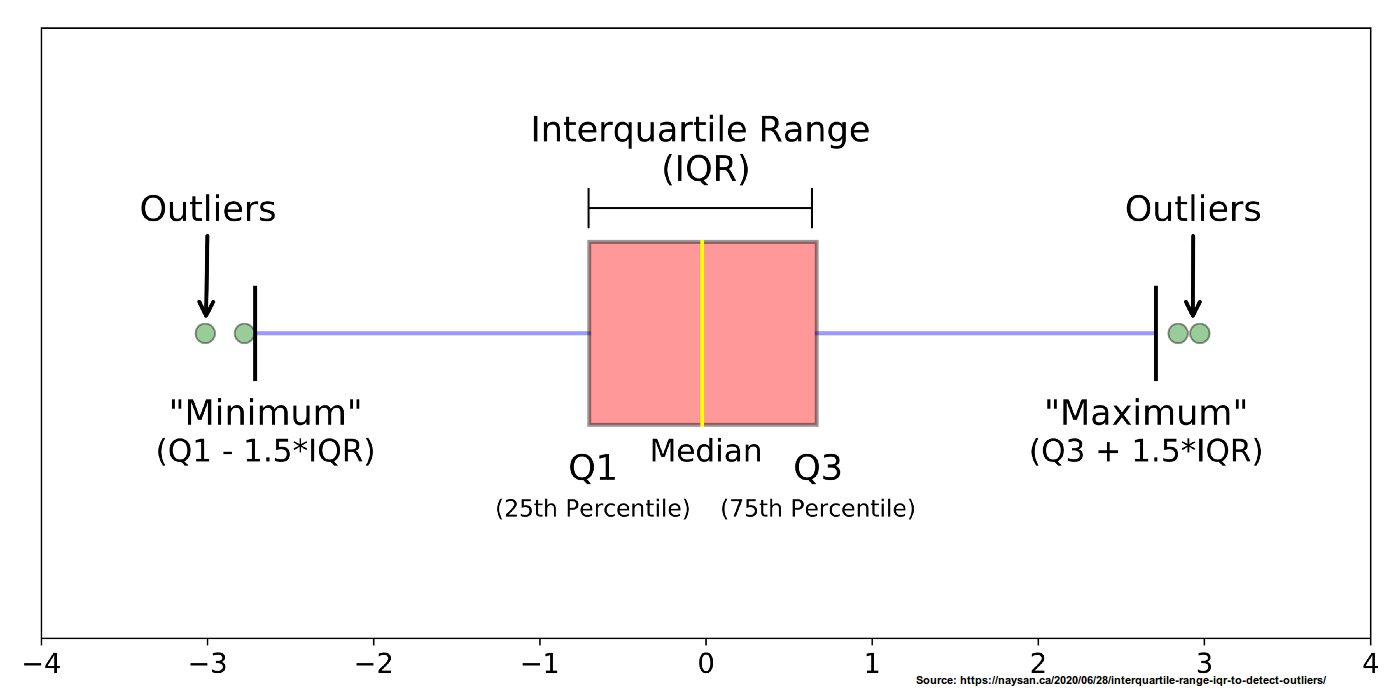

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Datasets/Week 4/IQR.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

In [ ]:
Q1 = toyota_df['Price'].quantile(0.25)
Q3 = toyota_df['Price'].quantile(0.75)
iqr = Q3 - Q1
print(iqr)

3500.0


In [ ]:
upper_limit = Q3 + 1.5 * iqr
lower_limit = Q1 - 1.5 * iqr
print(upper_limit,lower_limit)

17200.0 3200.0


In [ ]:
toyota_df[toyota_df['Price'] > upper_limit]

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
7,18600,30.000000,75889.0,Petrol,90.0,1.0,0,2000,3,1245
8,21500,27.000000,19700.0,Petrol,192.0,0.0,0,1800,3,1185
10,20950,25.000000,31461.0,Petrol,192.0,0.0,0,1800,3,1185
11,19950,22.000000,43610.0,Petrol,192.0,0.0,0,1800,3,1185
12,19600,25.000000,32189.0,Petrol,192.0,0.0,0,1800,3,1185
...,...,...,...,...,...,...,...,...,...,...
182,21125,2.000000,225.0,Petrol,97.0,1.0,0,1400,5,1110
183,21500,55.672156,15.0,Petrol,110.0,1.0,0,1600,5,1130
184,17795,1.000000,1.0,Petrol,98.0,1.0,0,1400,4,1100
185,18245,1.000000,1.0,Petrol,110.0,1.0,0,1600,5,1075


In [ ]:
temp_toyota_df = toyota_df[(toyota_df.Price<=upper_limit)&(toyota_df.Price>=lower_limit)]

In [ ]:
print(toyota_df.shape)
print(temp_toyota_df.shape)

(1436, 10)
(1326, 10)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

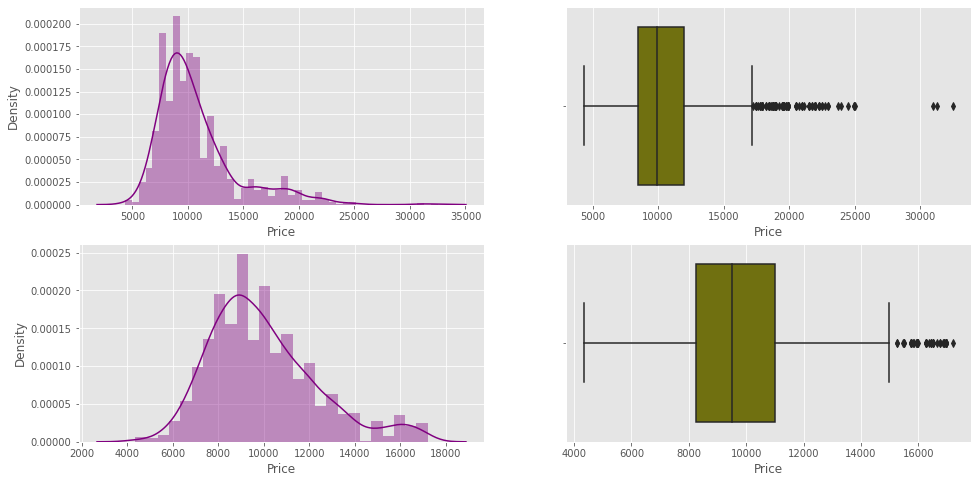

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.color_palette("Paired")
sns.distplot(toyota_df['Price'],color='purple')
plt.subplot(2,2,2)
sns.boxplot(toyota_df['Price'],color='olive')
plt.subplot(2,2,3)
sns.distplot(temp_toyota_df['Price'],color = 'purple')
plt.subplot(2,2,4)
sns.boxplot(temp_toyota_df['Price'],color='olive')
plt.show()

In [ ]:
new_toyota_df = toyota_df.copy()
new_toyota_df['Price'] = np.where(
    new_toyota_df['Price'] > upper_limit,
    upper_limit,
    np.where(
        new_toyota_df['Price'] < lower_limit,
        lower_limit,
        new_toyota_df['Price']
    )
)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

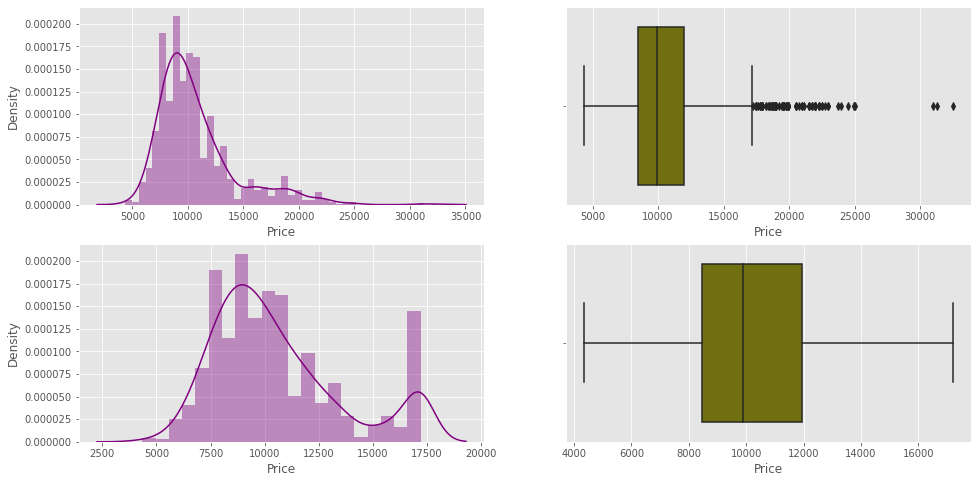

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.color_palette("Paired")
sns.distplot(toyota_df['Price'],color='purple')
plt.subplot(2,2,2)
sns.boxplot(toyota_df['Price'],color='olive')
plt.subplot(2,2,3)
sns.distplot(new_toyota_df['Price'],color = 'purple')
plt.subplot(2,2,4)
sns.boxplot(new_toyota_df['Price'],color='olive')
plt.show()

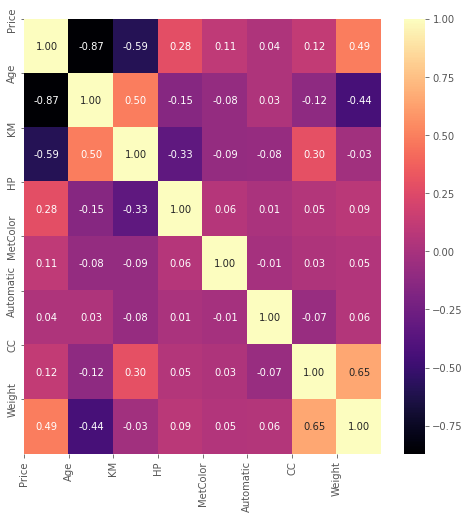

In [ ]:
# Check Correlation amoung parameters
corr = new_toyota_df.corr()
fig, ax = plt.subplots(figsize=(8,8))
# Generate a heatmap
sns.heatmap(corr, cmap = 'magma', annot = True, fmt = ".2f")
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

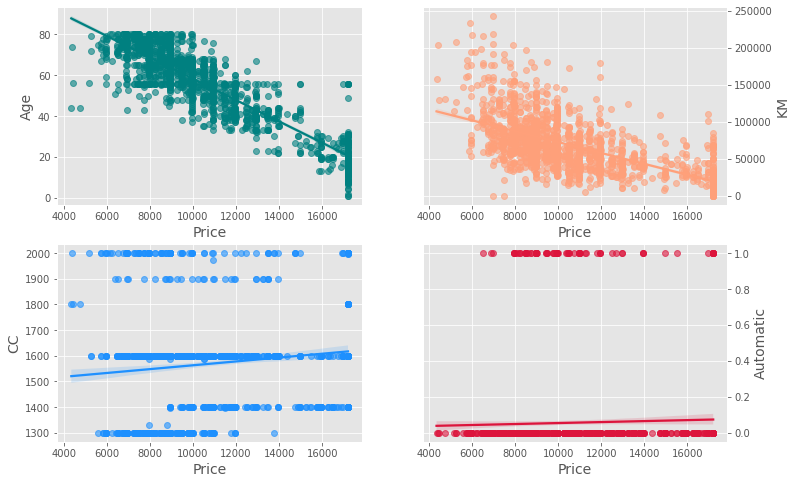

In [ ]:
# plot regplots  for Age, KM, CC & HP against Price
f, axes = plt.subplots(2,2, figsize=(12,8))
# Age Vs Price
sns.regplot(x = 'Price', y = 'Age', data = new_toyota_df, ax = axes[0,0], scatter_kws={'alpha':0.6},color='teal')
axes[0,0].set_xlabel('Price', fontsize = 14)
axes[0,0].set_ylabel('Age', fontsize=14)
axes[0,0].yaxis.tick_left()

# KM Vs Price
sns.regplot(x = 'Price', y = 'KM', data = new_toyota_df, ax = axes[0,1], scatter_kws={'alpha':0.6},color='lightsalmon')
axes[0,1].set_xlabel('Price', fontsize = 14)
axes[0,1].set_ylabel('KM', fontsize=14)
axes[0,1].yaxis.set_label_position("right")
axes[0,1].yaxis.tick_right()

# CC Vs Price
sns.regplot(x = 'Price', y = 'CC', data = new_toyota_df, ax = axes[1,0], scatter_kws={'alpha':0.6},color='dodgerblue')
axes[1,0].set_xlabel('Price', fontsize = 14)
axes[1,0].set_ylabel('CC', fontsize=14)
axes[1,0].yaxis.tick_left()

# Weight Vs Price
sns.regplot(x = 'Price', y = 'Automatic', data = new_toyota_df, ax = axes[1,1], scatter_kws={'alpha':0.6},color='crimson')
axes[1,1].set_xlabel('Price', fontsize = 14)
axes[1,1].set_ylabel('Automatic', fontsize=14)
axes[1,1].yaxis.set_label_position("right")
axes[1,1].yaxis.tick_right()
plt.show()